In [1]:
%matplotlib notebook

In [2]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#line, = ax.plot(x, np.sin(x))

def update(gamma = 1.0):
    #line.set_ydata(np.sin(w * x))
    #fig.canvas.draw_idle()
    return

interact(update);

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

**Multicell spectrum widget**

*Example widget:* https://stackoverflow.com/questions/44329068/jupyter-notebook-interactive-plot-with-widgets

In [3]:
import os
import pickle
import sys
from singlecell.singlecell_linalg import sorted_eig

# path hack for relative import in jupyter notebook
CELLTYPES = os.path.dirname(os.path.abspath(''))
sys.path.append(CELLTYPES)

from utils.file_io import RUNS_FOLDER
manyruns = RUNS_FOLDER + os.sep + 'multicell_manyruns'

Appended to sys path I:\Development\Repositories\biomodels\celltypes


In [11]:
# CHOICES
manyruns_label = 'Wdiag_gamma0.00_10k_fixedorder_p1_M4'
#manyruns_label = 'Wrandom0_gamma0.00_10k_p3_M100'
dy = 0.05
gamma_max = 2.0

# 1) access specific manyrun (gives access to multicell pkl file)
manyruns_dirpath = manyruns + os.sep + manyruns_label
multicell_pkl_path = manyruns_dirpath + os.sep + 'multicell_template.pkl'
with open(multicell_pkl_path, 'rb') as pickle_file:
    multicell_template = pickle.load(pickle_file)  # unpickling multicell object

# 2) construct gamma range
gamma_vals = np.arange(0.0, gamma_max + dy, dy)

In [12]:
def J_multicell_from_pkl(pkl, gamma, plot=False):
    J_multicell = pkl.build_J_multicell(gamma=gamma, plot=plot)
    return J_multicell

In [23]:
def plot_evals(J_multicell, gamma):
    evals, _ = sorted_eig(J_multicell, take_real=True, big_to_small=True)
    #plt.scatter(range(len(evals)), evals, marker='o', alpha=0.6, edgecolors='k', label='$\gamma=%.2f$' % gamma)
    plt.plot(range(len(evals)), evals, '--o', alpha=0.6, label='$\gamma=%.2f$' % gamma)


<IPython.core.display.Javascript object>


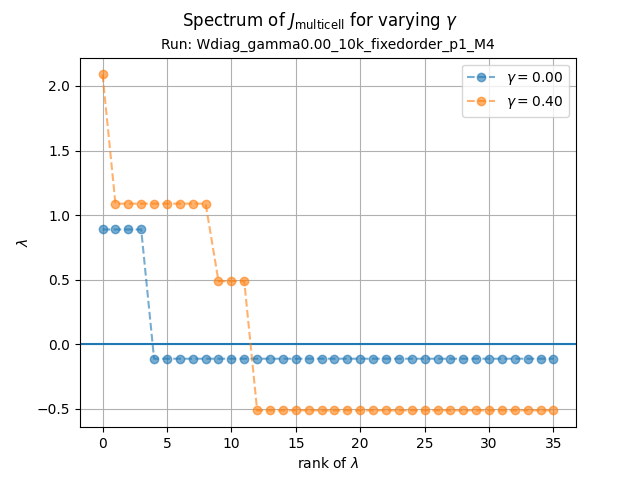

interactive(children=(Dropdown(description='gamma', options=(0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0…

<function __main__.update(gamma=1.0)>

In [39]:
# settings
show_legend = True
init = 0.0

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# labels
fig.suptitle(r'Spectrum of $J_{\mathrm{multicell}}$ for varying $\gamma$', fontsize=12)
plt.title('Run: %s' % manyruns_label, fontsize=10)
plt.xlabel('rank of $\lambda$')
plt.ylabel('$\lambda$')
# grid settings
plt.grid(True)
plt.rc('axes', axisbelow=True)
# zero line
plt.axhline(0)

def update(gamma = 1.0):
    J_multicell = J_multicell_from_pkl(multicell_template, gamma, plot=False)
    plot_evals(J_multicell, gamma)
    if show_legend:
        plt.legend()
    return

interact(update, gamma=widgets.Dropdown(options=gamma_vals, value=init))

In [8]:
#interact(update, gamma=widgets.FloatSlider(min=0, max=30, step=0.05, value=0))
interact(update, gamma=widgets.FloatSlider(min=0, max=gamma_max, step=dy, value=0))

interactive(children=(FloatSlider(value=0.0, description='gamma', max=2.0, step=0.05), Output()), _dom_classes…

<function __main__.update(gamma=1.0)>

**Plot eigenvectors**

In [36]:
def show_n_evecs(evecs, n, reshape_tuple=None, forcelims=False):
    # assumes already sorted largest to smallest
    print(evecs.shape)
    arr = evecs[:, 0:n]
    absmax = np.max(np.abs(arr))
    plt.figure()
    if forcelims:
        plt.imshow(arr, interpolation=None, cmap='coolwarm_r', vmin=-absmax, vmax=absmax)
    else:
        plt.imshow(arr, interpolation=None, cmap='coolwarm_r')
    plt.colorbar()
    plt.show()

(36, 36)


<IPython.core.display.Javascript object>


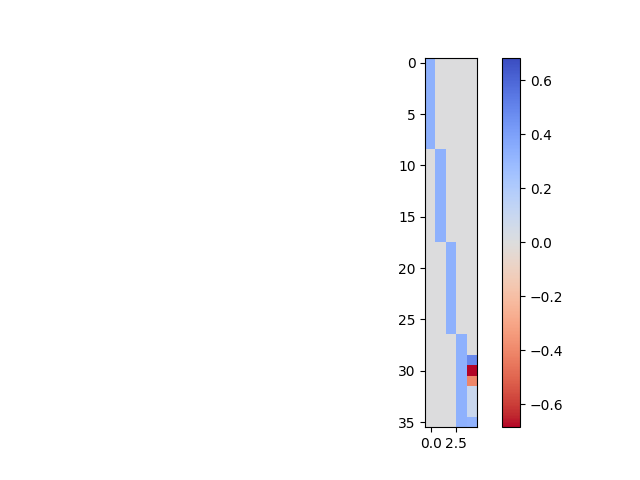

In [37]:
gamma_check = 0.0
J_multicell = J_multicell_from_pkl(multicell_template, gamma_check, plot=False)
evals, evecs = sorted_eig(J_multicell, take_real=True, big_to_small=True)
show_n_evecs(evecs, 5, forcelims=True)

(36, 36)


<IPython.core.display.Javascript object>


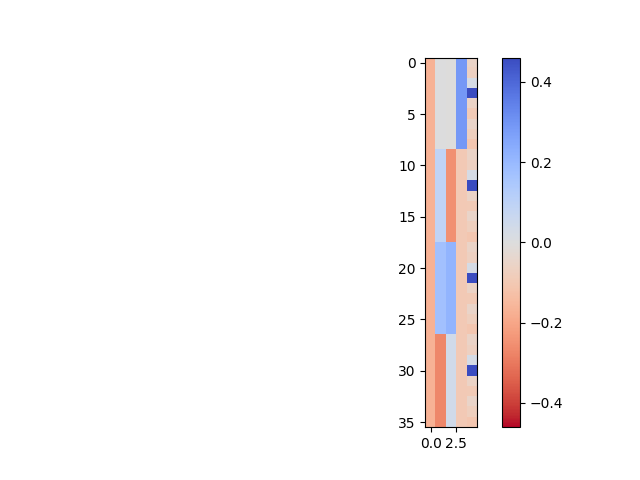

In [48]:
gamma_check = 0.05
J_multicell = J_multicell_from_pkl(multicell_template, gamma_check, plot=False)
evals, evecs = sorted_eig(J_multicell, take_real=True, big_to_small=True)
show_n_evecs(evecs, 5, forcelims=True)

array([-0.16666667,  0.00122416, -0.00358344, ..., -0.00734402,
        0.03958813, -0.02641038])

In [44]:
EV = evecs.reshape(36**2)

In [45]:
EV.shape

(1296,)

In [47]:
evecs.shape

(36, 36)